In [23]:
from minisom import MiniSom
import pandas as pd
import numpy as np

In [24]:
base = pd.read_csv('../../data/base de credito/base de credito.csv')

In [25]:
base = base.dropna()
base.loc[base.age<0, 'age'] = 40.92

In [26]:
X = base.iloc[:, 0:4].values
y = base.iloc[:,4].values

In [27]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [28]:
som = MiniSom(x=15, y=15, input_len=4, random_seed = 0)

In [29]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration = 100)

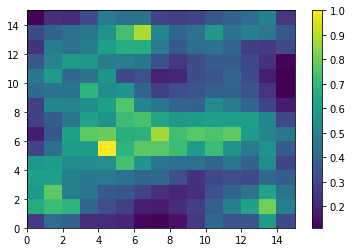

In [31]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()

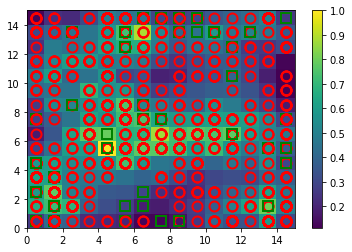

In [33]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1]+0.5, markers[y[i]], markerfacecolor = 'None', 
         markersize=10, markeredgecolor = colors[y[i]], markeredgewidth = 2)

In [34]:
mapeamento = som.win_map(X)

In [35]:
suspeitos = np.concatenate((mapeamento[(4,5)], mapeamento[(6,13)]), axis=0)
suspeitos = normalizador.inverse_transform(suspeitos)

In [37]:
classe=[]
for i in range(len(base)):
    for j in range(len(suspeitos)):
        if base.iloc[i,0] == int(round(suspeitos[j,0])):
            classe.append(base.iloc[i,4])

In [38]:
classe = np.asarray(classe)

In [41]:
suspeitos_final = np.column_stack((suspeitos, classe))

In [43]:
suspeitos_final = suspeitos_final[suspeitos_final[:,4].argsort()]

In [46]:
suspeitos_final

TypeError: type numpy.ndarray doesn't define __round__ method